In [146]:
#data analysis
import pandas as pd
import numpy as np
import random as rnd

#data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Faith\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score #accuracy score
from sklearn.model_selection import KFold  #cross valuation
from sklearn.model_selection import cross_val_score #score evaluation 
from sklearn.model_selection import cross_val_predict #prdicition
from sklearn.metrics import confusion_matrix  #confusion marix

In [148]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
combine=[train_df,test_df]

In [149]:
train_df.info()
print('                             ')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
                             
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non

In [150]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [151]:
 train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [152]:
print("Before drop",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

Before drop (891, 12) (418, 11) (891, 12) (418, 11)


In [153]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [154]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [155]:
train_df=train_df.drop(["Ticket","Cabin"],axis=1)

test_df=test_df.drop(["Ticket","Cabin"],axis=1)
 
combine=[train_df,test_df]

In [156]:
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [157]:
"After drop",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape        


('After drop', (891, 10), (418, 9), (891, 10), (418, 9))

In [158]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [159]:
for data in combine:
    data["Title"]=data.Name.str.extract("([A-Za-z]+)\.",expand=False)
    
pd.crosstab(train_df["Title"],train_df["Sex"])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [160]:
for dataset in combine:
    dataset["Title"]=dataset["Title"].replace(["Lady","Countess","Capt","Col","Don","Dr","Major","Rev",\
                                               "Sir","Jonkheer","Dona"],"Rare")
    dataset["Title"]=dataset["Title"].replace("Mlle","Miss")
    dataset["Title"]=dataset["Title"].replace("Ms","Miss")
    dataset["Title"]=dataset["Title"].replace("Mme","Mrs")
    dataset['Title']=dataset['Title'].fillna(0)
    
    
train_df.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [161]:
train_df[["Title","Survived"]].groupby(["Title"], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [162]:
title_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_mapping)
    dataset['Title']=dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [163]:
train_df=train_df.drop(["Name","PassengerId"],axis=1)
test_df=test_df.drop(["Name"],axis=1)
combine=[train_df,test_df]
train_df.shape,test_df.shape

((891, 9), (418, 9))

In [164]:
for dataset in combine:
    dataset["Sex"]=dataset["Sex"].map({"female":1,"male":0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


C:\Users\Faith\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


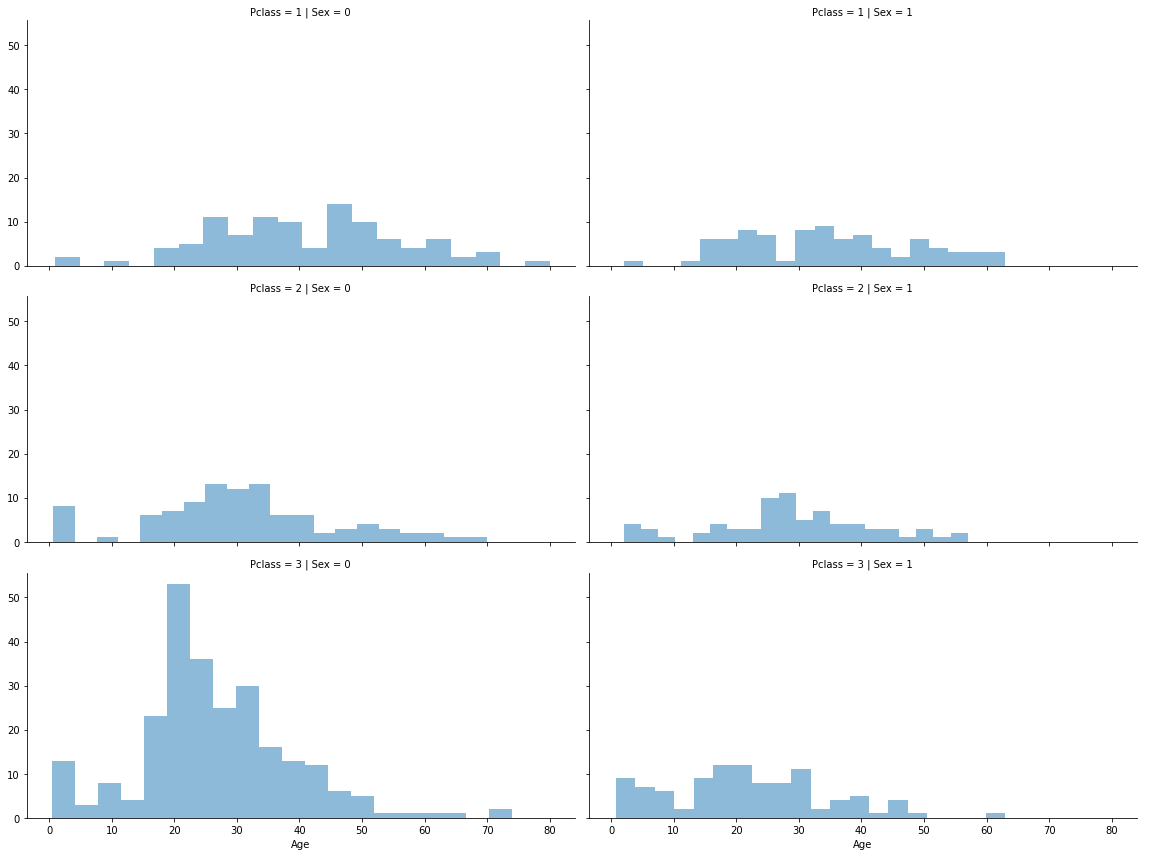

In [165]:
grid =sns.FacetGrid(train_df,row="Pclass",col="Sex",size=4,aspect=2)                                                               

grid.map(plt.hist,"Age",alpha=.5,bins=20)


grid.add_legend()


In [166]:
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [167]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            
            guess_df=dataset[(dataset["Sex"]==i) & (dataset["Pclass"]==j+1)]["Age"].dropna()#DROP NULL VALUES
            
            #age_mean=guess_df.mean()
            #age_std=guess_df.std()
            #age_guess=rnd.uniform(age_mean - age_std , age_mean + age_std)
            
            age_guess = guess_df.median()
            
            guess_ages[i,j]=(age_guess/0.5+0.5)*0.5 #round off
            
    for i in range (0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull())&(dataset.Sex==i)&(dataset.Pclass==j+1),"Age"] = guess_ages[i,j]
            
            
    dataset["Age"]=dataset["Age"]
    
train_df.head()
#train_df.info()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [175]:
train_df["AgeBand"]=pd.cut(train_df["Age"],5)
train_df[["AgeBand","Survived"]].groupby(["AgeBand"],as_index=False).mean().sort_values(by ="AgeBand")

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [176]:
for dataset in combine:
    dataset.loc[dataset["Age"]<=16,"Age"]=0
    dataset.loc[(dataset["Age"]>16)&(dataset["Age"]<= 32),"Age"]=1
    dataset.loc[(dataset["Age"]>32)&(dataset["Age"]<= 48),"Age"]=2
    dataset.loc[(dataset["Age"]>48)&(dataset["Age"]<= 64),"Age"]=3
    dataset.loc[dataset["Age"]>64,"Age"]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1.0,1,0,7.2500,S,1,"(16.336, 32.252]"
1,1,1,1,2.0,1,0,71.2833,C,3,"(32.252, 48.168]"
2,1,3,1,1.0,0,0,7.9250,S,2,"(16.336, 32.252]"
3,1,1,1,2.0,1,0,53.1000,S,3,"(32.252, 48.168]"
4,0,3,0,2.0,0,0,8.0500,S,1,"(32.252, 48.168]"


In [177]:
train_df=train_df.drop(["AgeBand"],axis=1)
combine=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1.0,1,0,7.2500,S,1
1,1,1,1,2.0,1,0,71.2833,C,3
2,1,3,1,1.0,0,0,7.9250,S,2
3,1,1,1,2.0,1,0,53.1000,S,3
4,0,3,0,2.0,0,0,8.0500,S,1


In [179]:
for dataset in combine:
    dataset["FamilySize"]=dataset["SibSp"]+dataset["Parch"]+1
train_df[["FamilySize","Survived"]].groupby(["FamilySize"],as_index=False).mean().sort_values(by="Survived")
 


,FamilySize,Survived
7,8,0.000000
8,11,0.000000
5,6,0.136364
4,5,0.200000
0,1,0.303538
6,7,0.333333
1,2,0.552795
2,3,0.578431
3,4,0.724138


In [119]:
for dataset in combine:
    dataset["isAlone"]=0
    dataset.loc[dataset["FamilySize"] ==1,"isAlone"]=1
train_df[["isAlone","Survived"]].groupby(["isAlone"],as_index=False).mean()    

,isAlone,Survived
0,0,0.505650
1,1,0.303538


In [120]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,isAlone
0,0,3,0,1.0,1,0,7.2500,S,1,2,0
1,1,1,1,2.0,1,0,71.2833,C,3,2,0
2,1,3,1,1.0,0,0,7.9250,S,2,1,1
3,1,1,1,2.0,1,0,53.1000,S,3,2,0
4,0,3,0,2.0,0,0,8.0500,S,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,13.0000,S,5,1,1
887,1,1,1,1.0,0,0,30.0000,S,2,1,1
888,0,3,1,1.0,1,2,23.4500,S,2,4,0
889,1,1,0,1.0,0,0,30.0000,C,1,1,1


In [180]:
train_df=train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
test_df=test_df.drop(['Parch','SibSp','FamilySize'],axis=1)
combine=[train_df,test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,0,1.0,7.2500,S,1
1,1,1,1,2.0,71.2833,C,3
2,1,3,1,1.0,7.9250,S,2
3,1,1,1,2.0,53.1000,S,3
4,0,3,0,2.0,8.0500,S,1


In [122]:
for dataset in combine:
    dataset['Age*Class']=dataset.Age*dataset.Pclass
train_df.loc[:,["Age*Class","Age","Pclass"]].head(10)

,Age*Class,Age,Pclass
0,3.0,1.0,3
1,2.0,2.0,1
2,3.0,1.0,3
3,2.0,2.0,1
4,6.0,2.0,3
5,3.0,1.0,3
6,3.0,3.0,1
7,0.0,0.0,3
8,3.0,1.0,3
9,0.0,0.0,2


In [184]:
freq_port=train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [185]:
for dataset in combine:
    dataset["Embarked"]=dataset['Embarked'].fillna(freq_port)
train_df[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived")

,Embarked,Survived
2,S,0.339009
1,Q,0.389610
0,C,0.553571


In [186]:
for dataset in combine:
    dataset["Embarked"]=dataset["Embarked"].map({"S":0,"C":1,"Q":2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title
0,0,3,0,1.0,7.2500,0,1
1,1,1,1,2.0,71.2833,1,3
2,1,3,1,1.0,7.9250,0,2
3,1,1,1,2.0,53.1000,0,3
4,0,3,0,2.0,8.0500,0,1


In [187]:
test_df["Fare"].fillna(test_df["Fare"].dropna().median(),inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title
0,892,3,0,2.0,7.8292,2,1
1,893,3,1,2.0,7.0000,0,3
2,894,2,0,3.0,9.6875,2,1
3,895,3,0,1.0,8.6625,0,1
4,896,3,1,1.0,12.2875,0,3


In [220]:
train_df["FareBand"]=pd.cut(train_df["Fare"],4)
train_df[["FareBand","Survived"]].groupby(["FareBand"],as_index=False).mean().sort_values(by="FareBand")

,FareBand,Survived
0,"(-0.001, -0.0005]",NaN
1,"(-0.0005, 0.0]",0.383838
2,"(0.0, 0.0005]",NaN
3,"(0.0005, 0.001]",NaN


In [201]:
for dataset in combine:
    dataset.loc[dataset["Fare"]<= 7.91,"Fare"]=0
    dataset.loc[(dataset["Fare"] > 7.91)&(dataset["Fare"] <= 14.454),"Fare"]=1
    dataset.loc[(dataset["Fare"] > 14.454)&(dataset["Fare"]<=31),"Fare"]=2
    dataset.loc[(dataset["Fare"] > 31),"Fare"]=3
    dataset["Fare"]=dataset["Fare"].astype(int)

train_df=train_df.drop(["FareBand"],axis=1)
combine=[train_df,test_df]
    

In [202]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title
0,892,3,0,2.0,0,2,1
1,893,3,1,2.0,0,0,3
2,894,2,0,3.0,0,2,1
3,895,3,0,1.0,0,0,1
4,896,3,1,1.0,0,0,3
5,897,3,0,0.0,0,0,1
6,898,3,1,1.0,0,2,2
7,899,2,0,1.0,0,0,1
8,900,3,1,1.0,0,1,3
9,901,3,0,1.0,0,0,1


In [203]:
X_train=train_df.drop("Survived",axis=1)
Y_train=train_df["Survived"]
X_test=test_df.drop("PassengerId",axis=1).copy()
X_train.shape,Y_train.shape,X_test.shape


((891, 6), (891,), (418, 6))

In [131]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [132]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,3,0,1.0,0,0,1,0,3.0
1,1,1,2.0,3,1,3,0,2.0
2,3,1,1.0,1,0,2,1,3.0
3,1,1,2.0,3,0,3,0,2.0
4,3,0,2.0,1,0,1,1,6.0
...,...,...,...,...,...,...,...,...
886,2,0,1.0,1,0,5,1,2.0
887,1,1,1.0,2,0,2,1,1.0
888,3,1,1.0,2,0,2,0,3.0
889,1,0,1.0,2,1,1,1,1.0


In [133]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Title,isAlone,Age*Class
0,3,0,2.0,0,2,1,1,6.0
1,3,1,2.0,0,0,3,0,6.0
2,2,0,3.0,1,2,1,1,6.0
3,3,0,1.0,1,0,1,1,3.0
4,3,1,1.0,1,0,3,0,3.0
...,...,...,...,...,...,...,...,...
413,3,0,1.0,1,0,1,1,3.0
414,1,1,2.0,3,1,5,1,2.0
415,3,0,2.0,0,0,1,1,6.0
416,3,0,1.0,1,0,1,1,3.0


In [216]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
pred = logreg.predict(X_test)
acc_logreg = round(logreg.score(X_train, Y_train) * 100, 2)
acc_logreg

78.11

In [217]:
coeff_df=pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns=['Feature']
coeff_df['Correlation']=pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.134278
5,Title,0.397166
4,Embarked,0.320873
3,Fare,0.000000
2,Age,-0.032219
0,Pclass,-0.968585


In [209]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)
pred=decision_tree.predict(X_test)
acc_decisiontree=round(decision_tree.score(X_train,Y_train)*100,2)
acc_decisiontree

84.18

In [210]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,Y_train)*100,2)
acc_knn

79.46

In [211]:
linreg=LinearRegression()
linreg.fit(X_train,Y_train)
pred=linreg.predict(X_test)
acc_linreg=round(linreg.score(X_train,Y_train)*100,2)
acc_linreg

38.97

In [212]:
nbreg=GaussianNB()
nbreg.fit(X_train,Y_train)
pred=nbreg.predict(X_test)
acc_nbreg=round(nbreg.score(X_train,Y_train)*100,2)
acc_nbreg

78.34

In [213]:
model_accresults=pd.DataFrame({
    'model':['Logistic Regression','Decision Tree','KNN','Linear Regression','Naive Bayes'],
    'score':[acc_log,acc_decisiontree,acc_knn,acc_lin,acc_nbreg]
})

In [214]:
result_traindf=model_acc_results.sort_values(by='score',ascending=False)
result_traindf.head(5)

,model,score
1,Decision Tree,86.76
2,KNN,83.84
0,Logistic Regression,80.36
4,Naive Bayes,72.28
3,Linear Regression,39.06


C:\Users\Faith\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Faith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


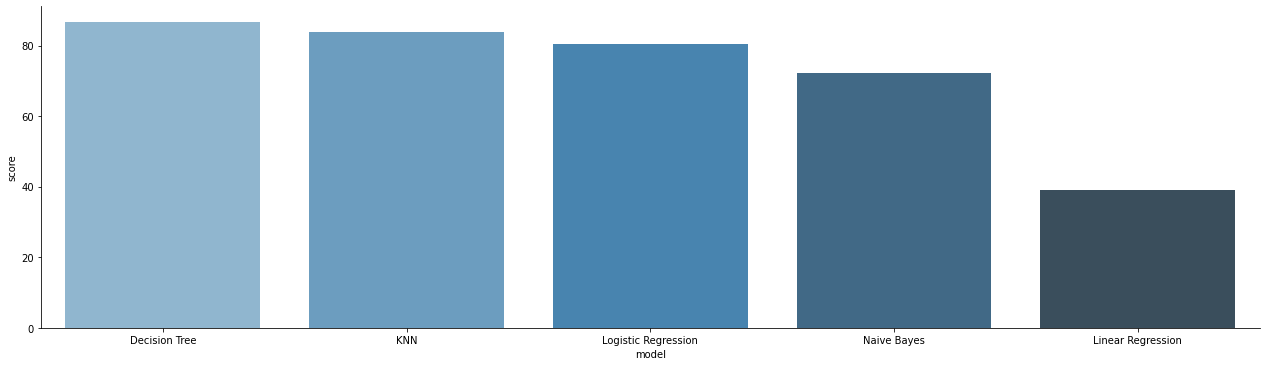

In [215]:
bestmodel_plot=result_traindf.head(9)
ax=sns.factorplot('model',y='score',data=bestmodel_plot,palette='Blues_d',aspect=3.5,kind='bar')